In [4]:
import numpy as np
import random as rnd

In [5]:
n_particles = 5

In [6]:
def rastrigin(A, n, x):
    return A * n + np.sum(x**2 - A * np.cos(2 * np.pi * x))

A = 2
x_values = np.array([0.1, 0.2, 0.3, 0.4, 0.5])

print(rastrigin(A, 2, x_values))

6.549999999999999


In [7]:
def __create_vector__(size, bounds) -> list:
        points = []
        for i in range(len(bounds)):
            points.append([np.random.uniform(bounds[i][0], bounds[i][1]) for _ in range(size)])
        return np.array(points)


# space = [
#     [2.6, 3.6],
#     [0.7, 0.8],
#     [17, 28],
#     [7.3, 8.3],
#     [7.8, 8.3],
#     [2.9, 3.9],
#     [5, 5.5]
# ]



mas = __create_vector__(5, [[-5, 5], [6, 8], [9, 10]])
print((mas))

[[ 2.53698685  2.58865401 -4.95973661 -1.05136507  1.65904172]
 [ 7.92634802  6.9725369   7.00636301  6.30469239  6.28200529]
 [ 9.4920616   9.12417805  9.12093909  9.29151329  9.30128533]]


In [8]:
print(mas)

[[ 2.53698685  2.58865401 -4.95973661 -1.05136507  1.65904172]
 [ 7.92634802  6.9725369   7.00636301  6.30469239  6.28200529]
 [ 9.4920616   9.12417805  9.12093909  9.29151329  9.30128533]]


In [9]:
import math

def rastrigin(X):
    n = len(X)  
    return 10*n + sum([xi**2 - 10*np.cos(2*np.pi*xi) for xi in X])

print(rastrigin(mas))

[200.1330697  160.09733435 159.9567598  153.6510916  169.30322752]


In [10]:
bounds = np.array([[-1.5, 1.5], [-0.5, 2.5]])
n = 5

def initialize_fireflies(bounds, n):
    return np.random.uniform(bounds[:, 0], bounds[:, 1], (n, len(bounds)))

print(initialize_fireflies(bounds, n))

[[ 0.25463462  0.90288669]
 [ 0.07470689  2.20266899]
 [ 0.43239899  1.40083676]
 [-1.09378664  1.67657691]
 [-0.60839754  1.16525659]]


In [11]:
import numpy as np

class FireflyAlgorithm: 
    def __init__(self, objective_function, colony_size, bounds, max_iter=100, beta0=1.0, gamma=1.0):
        self.objective_function = objective_function
        self.colony_size = colony_size
        self.bounds = bounds
        self.max_iter = max_iter
        self.beta0 = beta0
        self.gamma = gamma
    
    def __create_vector__(self):
        points = []
        for i in range(len(self.bounds)):
            points.append([np.random.uniform(self.bounds[i][0], self.bounds[i][1]) for _ in range(self.colony_size)])
        return np.array(points)
    
    def move_fireflies(self, fireflies, intensities):
        for i in range(self.colony_size):
            for j in range(self.colony_size):
                if intensities[i] > intensities[j]:
                    r = np.linalg.norm(fireflies[:, i] - fireflies[:, j])
                    beta = self.beta0 * np.exp(-self.gamma * r**2)
                    fireflies[:, i] += beta * (fireflies[:, j] - fireflies[:, i]) + 0.01 * np.random.randn(len(self.bounds))
                    for k in range(len(self.bounds)):
                        fireflies[k, i] = np.clip(fireflies[k, i], self.bounds[k][0], self.bounds[k][1])
        intensities = [self.objective_function(firefly) for firefly in fireflies.T]
        return fireflies, intensities
    
    def optimize(self):
        fireflies = self.__create_vector__()
        intensities = [self.objective_function(firefly) for firefly in fireflies.T]
        
        for _ in range(self.max_iter):
            fireflies, intensities = self.move_fireflies(fireflies, intensities)
        
        best_index = np.argmin(intensities)
        best_solution = fireflies[:, best_index]
        best_fitness = intensities[best_index]
        
        return best_solution, best_fitness

# Example usage for Rastrigin function
def rastrigin(x):
    n = len(x)
    return 10 * n + sum([(xi ** 2 - 10 * np.cos(2 * np.pi * xi)) for xi in x])

bounds_rastrigin = [[-5.12, 5.12]] * 10
fa_rastrigin = FireflyAlgorithm(rastrigin, colony_size=20, bounds=bounds_rastrigin)
best_solution_rastrigin, best_fitness_rastrigin = fa_rastrigin.optimize()
print("Best solution for Rastrigin:", best_solution_rastrigin)
print("Best fitness for Rastrigin:", best_fitness_rastrigin)

# Example usage for Rosenbrock function
def rosenbrock(x):
    return sum(100.0*(x[1:]-x[:-1]**2.0)**2.0 + (1-x[:-1])**2.0)

bounds_rosenbrock = [[-1.5, 1.5], [-0.5, 2.5]]
fa_rosenbrock = FireflyAlgorithm(rosenbrock, colony_size=20, bounds=bounds_rosenbrock)
best_solution_rosenbrock, best_fitness_rosenbrock = fa_rosenbrock.optimize()
print("Best solution for Rosenbrock:", best_solution_rosenbrock)
print("Best fitness for Rosenbrock:", best_fitness_rosenbrock)


Best solution for Rastrigin: [-1.35548363 -1.0516739  -0.94962841  3.23961216 -0.11443297  3.65631013
 -1.85982575  2.94870011 -3.1685653  -3.95853677]
Best fitness for Rastrigin: 119.723737003011
Best solution for Rosenbrock: [0.9959115  0.99191156]
Best fitness for Rosenbrock: 1.7231888416487392e-05


# Code

PSO found best solution at f([1.59897111 2.55565356])=0.3588776980084074
Global optimal at f([1.0101010101010102, 1.0101010101010102])=0.010512233961913071


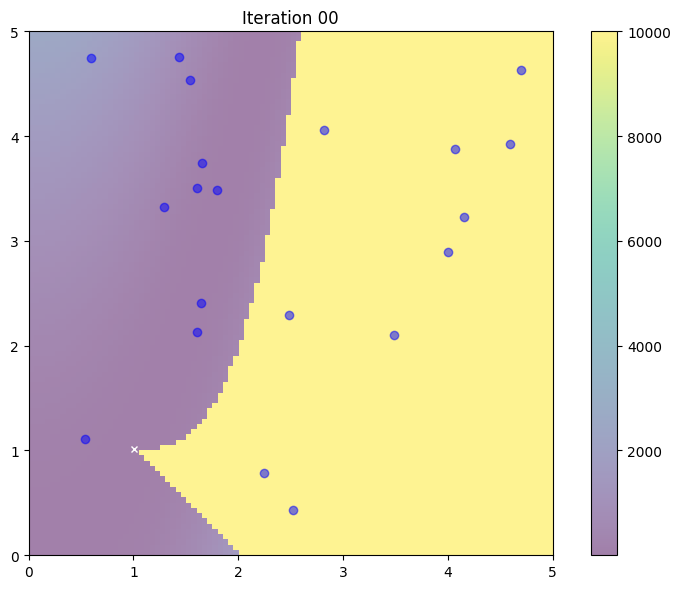

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

def f(x,y):
    condition_1 = ( (x - 1)**3 - y + 1 >= 0 )
    condition_2 = ( x + y - 2 >= 0 )

    func_values = np.array((1-x)**2 + 100*(y-x**2)**2)
    func_values[np.logical_and(condition_1, condition_2)] = 10000
    return func_values
    
# Compute and plot the function in 3D within [0,5]x[0,5]
x, y = np.array(np.meshgrid(np.linspace(0,5,100), np.linspace(0,5,100)))
z = f(x, y)

# Find the global minimum
x_min = x.ravel()[z.argmin()]
y_min = y.ravel()[z.argmin()]

# Hyper-parameter of the algorithm
c1 = c2 = 0.1
w = 0.8

# Create particles
n_particles = 20
bounds=[[0,5], [0, 5]]

def __create_vector__(size=20, bounds=[[0,5], [0, 5]]) -> list:
        points = []
        for i in range(len(bounds)):
            points.append([np.random.uniform(bounds[i][0], bounds[i][1]) for _ in range(size)])
        return np.array(points)


X = __create_vector__()
V = np.random.randn(len(bounds), n_particles) * 0.1

# Initialize data
pbest = X
pbest_obj = f(X[0], X[1])
gbest = pbest[:, pbest_obj.argmin()]
gbest_obj = pbest_obj.min()

value = {'X': []}

def update():
    for _ in range(50):
        "Function to do one iteration of particle swarm optimization"
        global V, X, pbest, pbest_obj, gbest, gbest_obj
        # Update params
        r1, r2 = np.random.rand(2)
        V = w * V + c1*r1*(pbest - X) + c2*r2*(gbest.reshape(-1,1)-X)
        X = X + V
        obj = f(X[0], X[1])
        pbest[:, (pbest_obj >= obj)] = X[:, (pbest_obj >= obj)]
        pbest_obj = np.array([pbest_obj, obj]).min(axis=0)
        gbest = pbest[:, pbest_obj.argmin()]
        gbest_obj = pbest_obj.min()
        value["X"].append(X)

# Set up base figure: The contour map
fig, ax = plt.subplots(figsize=(8,6))
fig.set_tight_layout(True)
img = ax.imshow(z, extent=[0, 5, 0, 5], origin='lower', cmap='viridis', alpha=0.5)
fig.colorbar(img, ax=ax)
ax.plot([x_min], [y_min], marker='x', markersize=5, color="white")
#contours = ax.contour(x, y, z, 10, colors='black', alpha=0.4)
#ax.clabel(contours, inline=True, fontsize=8, fmt="%.0f")
p_plot = ax.scatter(X[0], X[1], marker='o', color='blue', alpha=0.5)
#gbest_plot = plt.scatter([gbest[0]], [gbest[1]], marker='*', s=100, color='black', alpha=0.4)
ax.set_xlim([0,5])
ax.set_ylim([0,5])

def animate(i):
    "Steps of PSO: algorithm update and show in plot"
    title = 'Iteration {:02d}'.format(i)
    # Update params
    #update()
    # Set picture
    ax.set_title(title)
    p_plot.set_offsets(value["X"][i].T)
    return ax, p_plot


update()
anim = FuncAnimation(fig, animate, frames=len(value["X"]), interval=200, blit=False, repeat=True)
anim.save("PSO.gif", dpi=120, writer="pillow")

# print('X', X)
# print('pbest', pbest)
print("PSO found best solution at f({})={}".format(gbest, gbest_obj))
print("Global optimal at f({})={}".format([x_min,y_min], f(x_min,y_min)))